In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
from datetime import date
from IPython.display import display
from random import randint, uniform
import warnings
import statistics

In [94]:
!pip3 install openpyxl


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: C:\Users\pc\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [ ]:
raw = pd.read_csv('data/'+ ticker + '.csv').reset_index(drop=True).drop(columns=['Unnamed: 0'])
raw = raw.iloc[::-1][-2000:-500]
raw2 = raw[['date','open','close','volume','vwap','high','low'
                    ,'netIncome','totalAssets'
                    ,'totalCurrentAssets','totalDebt','totalCurrentLiabilities','totalEquity'
                    ,'netCashProvidedByOperatingActivities','netCashUsedForInvestingActivites'
                    ,'netCashUsedProvidedByFinancingActivities','netChangeInCash','capitalExpenditure'
                    ,'cashPerShare','currentRatio','returnOnTangibleAssets','earningsYield']]
raw2.rename(columns={
    'date':'Date',
    'open':'Open',
    'close':'Close',
    'volume':'Volume',
    'vwap':'Vwap',
    'high':'High',
    'low':'Low'
},inplace=True)


In [ ]:
import pandas as pd
import numpy as np

# Sample DataFrame with a Date column and a constant column
data = {'Date': ['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04', '2021-01-05'],
        'Feature1': [1, 2, 3, 4, 5],
        'Feature2': [2, 2, 2, 2, 2]}  # Constant column
df = pd.DataFrame(data)

# Normalization function with epsilon, excluding the first column
def normalize_with_epsilon_exclude_first(df, epsilon=1e-8):
    # Select columns to normalize (excluding the first column)
    df_to_normalize = df.iloc[:, 1:]
    
    # Calculate range and replace 0 with 1 to prevent division by zero
    range = df_to_normalize.max() - df_to_normalize.min()
    range[range == 0] = 1  # Prevent division by zero for constant columns
    
    # Normalize, safely handling constant columns
    normalized_df = (df_to_normalize - df_to_normalize.min()) / (range + epsilon)
    
    # Combine the untouched first column with the normalized columns
    result_df = pd.concat([df.iloc[:, 0], normalized_df], axis=1)
    return result_df

# Apply normalization, excluding the first column
normalized_df = normalize_with_epsilon_exclude_first(df)

print(normalized_df)

In [ ]:
#Create Training Data
tickers = ['PLD','AMT','PSA','SPG','DLR','EQR']
training_array = {}

for ticker in tickers:
    raw = pd.read_csv('data/'+ ticker + '.csv').reset_index(drop=True).drop(columns=['Unnamed: 0'])
    raw = raw.iloc[::-1][-2000:-500]
    raw2 = raw[['date','open','close','volume','vwap','high','low'
                        ,'netIncome','totalAssets'
                        ,'totalCurrentAssets','totalDebt','totalCurrentLiabilities','totalEquity'
                        ,'netCashProvidedByOperatingActivities','netCashUsedForInvestingActivites'
                        ,'netCashUsedProvidedByFinancingActivities','netChangeInCash','capitalExpenditure'
                        ,'cashPerShare','currentRatio','returnOnTangibleAssets','earningsYield']]
    raw2.rename(columns={
        'date':'Date',
        'open':'Open',
        'close':'Close',
        'volume':'Volume',
        'vwap':'Vwap',
        'high':'High',
        'low':'Low'
    },inplace=True)
    # normalise data
    num_cols = [col for col in raw2.columns if col != "Date"]
    raw2 = normalize_with_epsilon_exclude_first(raw2)
    raw2 = raw2.replace(0.00000,0.0000001)
    training_array[ticker] = raw2
training_array

In [ ]:
#Create Test Data
test_array = {}

for ticker in tickers:
    raw = pd.read_csv('data/'+ ticker + '.csv').reset_index(drop=True).drop(columns=['Unnamed: 0'])
    raw = raw.iloc[::-1][-500:]
    raw2 = raw[['date','open','close','volume','vwap','high','low'
                        ,'netIncome','totalAssets'
                        ,'totalCurrentAssets','totalDebt','totalCurrentLiabilities','totalEquity'
                        ,'netCashProvidedByOperatingActivities','netCashUsedForInvestingActivites'
                        ,'netCashUsedProvidedByFinancingActivities','netChangeInCash','capitalExpenditure'
                        ,'cashPerShare','currentRatio','returnOnTangibleAssets','earningsYield']]
    raw2.rename(columns={
        'date':'Date',
        'open':'Open',
        'close':'Close',
        'volume':'Volume',
        'vwap':'Vwap',
        'high':'High',
        'low':'Low'
    },inplace=True)
    # normalise data
    num_cols = [col for col in raw2.columns if col != "Date"]
    raw2 = normalize_with_epsilon_exclude_first(raw2)
    raw2 = raw2.replace(0.00000,0.0000001)
    test_array[ticker] = raw2
test_array

In [ ]:
#string = '(Open+Close+High+High)/3'
string = 'totalAssets * (netChangeInCash) + Open - netIncome'
fields = ['Date','Open','Close','Volume','Vwap','High','Low'
                        ,'netIncome','totalAssets'
                        ,'totalCurrentAssets','totalDebt','totalCurrentLiabilities','totalEquity'
                        ,'netCashProvidedByOperatingActivities','netCashUsedForInvestingActivites'
                        ,'netCashUsedProvidedByFinancingActivities','netChangeInCash','capitalExpenditure'
                        ,'cashPerShare','currentRatio','returnOnTangibleAssets','earningsYield']
def create_expression(string):
    for field in fields:
        string = string.replace(field,f'x[\'{field}\']')
    return string

print(create_expression(string))

In [ ]:
def day_average(df):
    df['Day Ave'] = df.apply(lambda x: (x['Open']+x['Close']+x['High'])/3, axis=1)
    return df

In [ ]:
def returns(df):
    df['Yesterday Ave'] = df['Day Ave'].shift()
    df['Dod Return'] = (df['Day Ave'] - df['Yesterday Ave'])/abs(df['Yesterday Ave'])
    df['Tommorrow Ave'] = df['Day Ave'].shift(-1)
    df['2nd Dod Return'] = (df['Tommorrow Ave'] - df['Day Ave'])/abs(df['Day Ave'])
    return df

In [ ]:
def returns(df):
    df['Yesterday Ave'] = df['Day Ave'].shift()
    df['Dod Return'] = (df['Day Ave'] - df['Yesterday Ave'])/abs(df['Yesterday Ave'])
    df['Tommorrow Ave'] = df['Day Ave'].shift(-1)
    df['2nd Dod Return'] = (df['Tommorrow Ave'] - df['Day Ave'])/abs(df['Day Ave'])
    return df

In [ ]:
def alpha_value(df,string):
    df['Alpha Value'] = df.apply(lambda x: eval(create_expression(string)), axis=1)
    return df

In [ ]:
def calculate_alpha_performance(files_array,alpha_expr,transaction_cost):
    #print(f"Calculating performance for alpha: {alpha_expr}")
    combi = pd.DataFrame(files_array[next(iter(files_array))].reset_index()['Date']) # get list of dates from any ticker
    for key,value in files_array.items():
        day_average(value)
        returns(value)
        dod_return = pd.DataFrame(value[['Date','Dod Return']])
        dod_return.rename(columns={'Dod Return':f'{key} Dod Return'},inplace=True)
        combi = combi.merge(dod_return,on='Date',how='left')
    #print("\nDay on day returns for each ticker:")
    #print(files_array)
    #display(combi)
    
    combination = combi.melt(['Date'], var_name='Ticker', value_name='Dod Return') #need to double melt 2nd dod return
    combination.sort_values('Date', inplace=True)
    combination.dropna(inplace=True)
    #print("\nTranspose df:")
    #display(combination)
    
    combi2 = pd.DataFrame(files_array[next(iter(files_array))].reset_index()['Date'])
    for key,value in files_array.items():
        day_average(value)
        returns(value)
        dod_return = pd.DataFrame(value[['Date','2nd Dod Return']])
        dod_return.rename(columns={'2nd Dod Return':f'{key} Dod Return'},inplace=True)
        combi2 = combi2.merge(dod_return,on='Date',how='left')
    
    #print("\nDay on day returns for following day for each ticker:")
    #display(combi2)
    
    combination2 = combi2.melt(['Date'], var_name='Ticker', value_name='2nd Dod Return') #need to double melt 2nd dod return
    combination2.sort_values('Date', inplace=True)
    combination2.dropna(inplace=True)
    #print("\nTranspose df for following day:")
    #display(combination2)
    
    combi3 = pd.DataFrame(files_array[next(iter(files_array))].reset_index()['Date']) # get list of dates from any ticker
    for key,value in files_array.items():
        alpha_value(value,alpha_expr)
        alpha_return = pd.DataFrame(value[['Date','Alpha Value']])
        alpha_return.rename(columns={'Alpha Value':f'{key} Dod Return'},inplace=True)
        #print("TESTTTT")
        #display(alpha_return)
        #display(combi)
        combi3 = combi3.merge(alpha_return,on='Date',how='left')
    #print("COMBI 3")
    #display(combi3)
        
    #print("\nAlpha value for each ticker:")
    combination4 = combi3.melt(['Date'], var_name='Ticker', value_name='Alpha Value') #need to double melt 2nd dod return
    combination4.sort_values('Date', inplace=True)
    combination4.dropna(inplace=True)
    #print("COMBI 4")
    #display(combination4)
    
    
    combination3 = combination.merge(combination2,how='left',on=['Date','Ticker'])
    combination3 = combination3.merge(combination4,how='left',on=['Date','Ticker'])
    #print("\nMerge both dfs:")
    #display(combination3)
    
    combination3['Rank'] = combination3.sort_values(['Alpha Value'], ascending=[True]).groupby(['Date']).cumcount() + 1
    combination3['Alpha Rank'] = combination3['Rank'].apply(lambda x: x * (1/(len(tickers)-1)) - (1/(len(tickers)-1)))
    combination3['Centered 0'] = combination3['Alpha Rank'] - 0.5
    combination3['Abs Centered 0'] = abs(combination3['Centered 0'])
    combination3['Sum Rank'] = combination3.apply(lambda x: sum(combination3[combination3['Date']==x['Date']]['Abs Centered 0']),axis=1)
    combination3['Normalized'] = combination3.apply(lambda x: -x['Abs Centered 0']/x['Sum Rank'] if x['Centered 0'] < 0 else x['Abs Centered 0']/x['Sum Rank'], axis=1)
    combination3['Allocated'] = combination3['Normalized'] * 20
    combination3['PnL'] = combination3['Allocated'] * combination3['2nd Dod Return']
    #print("\nAllocate portfolio based on Alpha Rank:")
    #display(combination3)
    
    final = combination3[['Date','PnL']]
    final['PnL'] = final['PnL'] - (abs(final['PnL'])*transaction_cost)
    #final['PnL'] = final['PnL'].apply(lambda x: x - abs(x)*transaction_cost)
    pnl = final.groupby(['Date']).sum()
    pnl['PnL'] = pnl['PnL'].cumsum()
    pnl.reset_index(inplace=True)
    #display(pnl)
    #pnl.plot(kind='line',x='Date',y='PnL');
    
    return combination3,pnl
    

In [ ]:
def objective(files_array,candidate_string):
    # Evaluate profit for alpha candidate for 1 year period
    resultDf,pnlDf = calculate_alpha_performance(files_array,candidate_string,0.01)
    one_year_return = pnlDf.iloc[-6,1] - pnlDf.iloc[-365,1]  
    six_month_return = pnlDf.iloc[-6,1] - pnlDf.iloc[-180,1]
    three_month_return = pnlDf.iloc[-6,1] - pnlDf.iloc[-90,1]  
    one_month_return = pnlDf.iloc[-6,1] - pnlDf.iloc[-30,1]  
    average_return = (one_month_return + three_month_return + six_month_return + one_year_return)/4
    print("AVERAGE RETURN: ", average_return)
    return average_return

In [ ]:
p1 = '(Open + Volume + (Close) - Low / ((Low + Close)))'
p2 = 'Close - (High * High - Low + Open * High)'
r_cross = 0.8

def crossover(p1,p2,r_cross):
    operators = ['+','-','/','*']
    print("BEFORE CROSSOVER PAIR 1.",p1," 2.",p2)

    if uniform(0,1) < r_cross:
        #p1
        valid_crossover_p1 = []
        for idx in range(len(p1)):
            char = p1[idx]
            if char in operators:
                valid_crossover_p1.append(idx)
        #print(valid_crossover_p1)
        if len(valid_crossover_p1) < 1:
            print("AFTER CROSSOVER PAIR 1.",p1," 2.",p2,' NO CHANGE.')
            return [p1+' + '+p2,p2+' + '+p1]
        elif len(valid_crossover_p1) == 1:
            chosen_idx_p1 = valid_crossover_p1[0]
        else:
            chosen_idx_p1 = valid_crossover_p1[randint(0,len(valid_crossover_p1)-1)]         
        left_p1 = p1[:chosen_idx_p1-1]
        right_p1 = p1[chosen_idx_p1+2:]
        fixed_left_p1 = left_p1 + find_missing_bracket(left_p1)
        fixed_right_p1 = find_missing_bracket(right_p1) + right_p1
        #print("fixed left p1: ",fixed_left_p1," fixed right p1: ",fixed_right_p1)

        #p2
        valid_crossover_p2 = []
        for idx in range(len(p2)):
            char = p2[idx]
            if char in operators:
                valid_crossover_p2.append(idx)
        #print(valid_crossover_p2)
        if len(valid_crossover_p2) < 1:
            print("AFTER CROSSOVER PAIR 1.",p1," 2.",p2,' NO CHANGE.')
            return [p1+' + '+p2,p2+' + '+p1]
        elif len(valid_crossover_p2) == 1:
            chosen_idx_p2 = valid_crossover_p2[0]
        else:
            chosen_idx_p2 = valid_crossover_p2[randint(0,len(valid_crossover_p2)-1)]         
        left_p2 = p2[:chosen_idx_p2-1]
        right_p2 = p2[chosen_idx_p2+2:]
        fixed_left_p2 = left_p2 + find_missing_bracket(left_p2)
        fixed_right_p2 = find_missing_bracket(right_p2) + right_p2
        #print("fixed left p2: ",fixed_left_p2," fixed right p2: ",fixed_right_p2)
        
        c1 = fixed_left_p1 + ' + ' + fixed_right_p2
        c2 = fixed_left_p2 + ' + ' + fixed_right_p1
        print("OUTPUT PAIR: ",c1," 2.",c2, " CROSSED.")
        return [c1,c2]
    print("AFTER CROSSOVER PAIR 1.",p1," 2.",p2,' NO CHANGE.')
    return [p1,p2]

In [ ]:
def genetic_algorithm(objective,files_array, n_iter, n_pop, r_cross, r_mut,fields):
    # initial population of random bitstring
    pop = generateAlphas(n_pop)
    
    # keep track of best solution
    best, best_eval = 0, objective(files_array,pop[0])
    # enumerate generations
    for gen in range(n_iter):
        print("--- Iteration ", str(gen+1), " out of ", str(n_iter), ". \nCurrent Population: ",pop)
        # evaluate all candidates in the population
        scores = [objective(files_array,c) for c in pop]
        print(scores)
        # check for new best solution
        for i in range(n_pop):
            if scores[i] > best_eval:
                best, best_eval = pop[i], scores[i]
                print(">%d, new best f(%s) = %.3f" % (gen, pop[i], scores[i]))
                
        # select parents
        selected = [selection(pop, scores) for _ in range(n_pop)]
        print("Selected Parents",selected)
        # create the next generation
        children = list()
        for i in range(0, n_pop, 2):
            # get selected parents in pairs
            p1, p2 = selected[i], selected[i+1]
        # crossover and mutation
            for c in crossover(p1, p2, r_cross):
                # mutation
                mutation(c, fields, r_mut)
                # store for next generation
                children.append(c)
        # replace population
        pop = children
    return [best, best_eval]

In [ ]:
def selection(pop,scores,k=3):
    # first random selection
    selection_ix = randint(0,len(pop)-1)
    for ix in [randint(0,len(pop)-1) for x in range(k-1)]:
    # check if better (e.g. perform a tournament)
        if scores[ix] > scores[selection_ix]:
            selection_ix = ix
    return pop[selection_ix]

In [ ]:
def mutation(string,fields,r_mut):
    print("BEFORE Mutation: ",string)
    for feature in fields:
        #print("STRING",string)
        #print(feature)
        split = string.split(feature)
        #print("split: ",split)
        terms = len(split)
        if terms > 1:
            replacements = []
            for i in range(terms-1):
                if uniform(0,1) < r_mut:
                    replacements.append(fields[randint(0,len(fields)-1)])
                else:
                    replacements.append(feature)
            #print("replacements: ",replacements)            
        string = ''
        for i in range(len(split)):
            string += split[i]
            if i < (len(split)-1):
                string += replacements[i]
    print("After Mutation: ",string)


In [ ]:
from random import random, randint, choice

def randomAlpha(prob,datafields):
    p = random()
    if p > prob:
        return datafields[randint(0, len(datafields)-1)]
    elif randint(0, 1) == 0:
        return ParenthesizedExpression(randomAlpha(prob / 1.2,datafields))
    else:
        left = randomAlpha(prob / 1.2,datafields)
        op = choice(["+", "-", "*", "/"])
        right = randomAlpha(prob / 1.2,datafields)
        return BinaryExpression(left, op, right)
        #return str(left) + ' ' + str(op) + ' ' + str(right) 

def generateAlphas(number):
    past_alphas = []
    alphas_to_sim = []
    for i in range(number):
        duplicate = True
        while duplicate:
            generated = randomAlpha(1,fields)
            if generated not in past_alphas:
                duplicate = False
                #past_alphas.append(generated) # use this to output expressions
                past_alphas.append(str(generated)) # use this to output string
    return past_alphas


In [ ]:
class Expression:
    pass

class Number(Expression):
    def __init__(self, num):
        self.num = num

    def __str__(self):
        return str(self.num)

class BinaryExpression(Expression):
    def __init__(self, left, op, right):
        self.left = left
        self.op = op
        self.right = right

    def __str__(self):
        return str(self.left) + " " + self.op + " "  + str(self.right)

class ParenthesizedExpression(Expression):
    def __init__(self, exp):
        self.exp = exp

    def __str__(self):
        return "(" + str(self.exp) + ")"

e1 = Number(5)

In [ ]:
def find_missing_bracket(input_string):
    # return the number of missing brackets
    close_bracket_count = 0
    open_bracket_count = 0
    for char in input_string:
        if char == '(':
            open_bracket_count += 1
        elif char == ')':
            close_bracket_count += 1
    abs_difference = abs(open_bracket_count-close_bracket_count) 
    if open_bracket_count > close_bracket_count:
        return abs_difference*")"
    elif close_bracket_count > open_bracket_count:
        return abs_difference*"("
    else:
        return ""

In [ ]:
n_pop = 10
n_iter = 20
r_cross = 1 # crossover rate 0.8
r_mut = 0.2 # flip bits with probability

In [ ]:
genetic_algorithm(objective, training_array, n_iter, n_pop, r_cross, r_mut, fields)

AVERAGE RETURN:  -0.3251061187077684
--- Iteration  1  out of  20 . 
Current Population:  ['((currentRatio) + totalCurrentAssets / (Open) * ((netCashUsedForInvestingActivites + High + cashPerShare)) * (Close) - netCashProvidedByOperatingActivities)', 'netIncome + Date / netIncome * ((Close)) * totalAssets / currentRatio + totalCurrentLiabilities / ((currentRatio + (totalCurrentLiabilities)))', 'cashPerShare * totalAssets / totalCurrentLiabilities * High + (totalDebt - totalCurrentAssets / (Vwap) * Close) - Date - (returnOnTangibleAssets)', '((High))', '((netIncome + (((Low))) - (totalEquity / currentRatio * (netCashUsedProvidedByFinancingActivities)) + Volume + Close * Vwap * (capitalExpenditure) + (High) - netCashUsedForInvestingActivites / (totalAssets)))', '(((totalCurrentLiabilities * High)) - (capitalExpenditure - netCashUsedProvidedByFinancingActivities / (returnOnTangibleAssets)) - (returnOnTangibleAssets))', '(Close - ((netCashProvidedByOperatingActivities))) + totalAssets', '(

In [ ]:
def calculate_alpha_performance_test(files_array,alpha_expr,transaction_cost):
    print(f"Calculating performance for alpha: {alpha_expr}")
    combi = pd.DataFrame(files_array[next(iter(files_array))].reset_index()['Date']) # get list of dates from any ticker
    for key,value in files_array.items():
        day_average(value)
        returns(value)
        dod_return = pd.DataFrame(value[['Date','Dod Return']])
        dod_return.rename(columns={'Dod Return':f'{key} Dod Return'},inplace=True)
        combi = combi.merge(dod_return,on='Date',how='left')
    print("\nDay on day returns for each ticker:")
    print(files_array)
    display(combi)
    
    combination = combi.melt(['Date'], var_name='Ticker', value_name='Dod Return') #need to double melt 2nd dod return
    combination.sort_values('Date', inplace=True)
    combination.dropna(inplace=True)
    print("\nTranspose df:")
    display(combination)
    
    combi2 = pd.DataFrame(files_array[next(iter(files_array))].reset_index()['Date'])
    for key,value in files_array.items():
        day_average(value)
        returns(value)
        dod_return = pd.DataFrame(value[['Date','2nd Dod Return']])
        dod_return.rename(columns={'2nd Dod Return':f'{key} Dod Return'},inplace=True)
        combi2 = combi2.merge(dod_return,on='Date',how='left')
    
    print("\nDay on day returns for following day for each ticker:")
    display(combi2)
    
    combination2 = combi2.melt(['Date'], var_name='Ticker', value_name='2nd Dod Return') #need to double melt 2nd dod return
    combination2.sort_values('Date', inplace=True)
    combination2.dropna(inplace=True)
    print("\nTranspose df for following day:")
    display(combination2)
    
    combi3 = pd.DataFrame(files_array[next(iter(files_array))].reset_index()['Date']) # get list of dates from any ticker
    for key,value in files_array.items():
        alpha_value(value,alpha_expr)
        alpha_return = pd.DataFrame(value[['Date','Alpha Value']])
        alpha_return.rename(columns={'Alpha Value':f'{key} Dod Return'},inplace=True)
        #print("TESTTTT")
        #display(alpha_return)
        #display(combi)
        combi3 = combi3.merge(alpha_return,on='Date',how='left')
    print("COMBI 3")
    display(combi3)
        
    print("\nAlpha value for each ticker:")
    combination4 = combi3.melt(['Date'], var_name='Ticker', value_name='Alpha Value') #need to double melt 2nd dod return
    combination4.sort_values('Date', inplace=True)
    combination4.dropna(inplace=True)
    print("COMBI 4")
    display(combination4)
    
    
    combination3 = combination.merge(combination2,how='left',on=['Date','Ticker'])
    combination3 = combination3.merge(combination4,how='left',on=['Date','Ticker'])
    print("\nMerge both dfs:")
    display(combination3)
    
    combination3['Rank'] = combination3.sort_values(['Alpha Value'], ascending=[True]).groupby(['Date']).cumcount() + 1
    combination3['Alpha Rank'] = combination3['Rank'].apply(lambda x: x * (1/(len(tickers)-1)) - (1/(len(tickers)-1)))
    combination3['Centered 0'] = combination3['Alpha Rank'] - 0.5
    combination3['Abs Centered 0'] = abs(combination3['Centered 0'])
    combination3['Sum Rank'] = combination3.apply(lambda x: sum(combination3[combination3['Date']==x['Date']]['Abs Centered 0']),axis=1)
    combination3['Normalized'] = combination3.apply(lambda x: -x['Abs Centered 0']/x['Sum Rank'] if x['Centered 0'] < 0 else x['Abs Centered 0']/x['Sum Rank'], axis=1)
    combination3['Allocated'] = combination3['Normalized'] * 20
    combination3['PnL'] = combination3['Allocated'] * combination3['2nd Dod Return']
    print("\nAllocate portfolio based on Alpha Rank:")
    display(combination3)
    
    final = combination3[['Date','PnL']]
    final['PnL'] = final['PnL'] - (abs(final['PnL'])*transaction_cost)
    pnl = final.groupby(['Date']).sum()
    pnl['PnL'] = pnl['PnL'].cumsum()
    pnl.reset_index(inplace=True)
    display(pnl)
    pnl.plot(kind='line',x='Date',y='PnL');
    
    return combination3,pnl
    

Calculating performance for alpha: ((Low) - ((Open))) + Close - Low + ((High / Volume))

Day on day returns for each ticker:
{'PLD':            Date      Open     Close        Volume      Vwap      High  \
499  2022-01-04  0.865766  0.841326  1.775800e-01  0.865708  0.877949   
498  2022-01-05  0.824170  0.797067  1.543777e-01  0.820540  0.824940   
497  2022-01-06  0.777326  0.782798  1.112005e-01  0.789353  0.773522   
496  2022-01-07  0.765123  0.745277  1.324747e-01  0.765291  0.765439   
495  2022-01-10  0.711062  0.735896  1.752189e-01  0.730206  0.718924   
..          ...       ...       ...           ...       ...       ...   
4    2023-12-22  0.431439  0.463469  6.794825e-02  0.458865  0.452425   
3    2023-12-26  0.449679  0.477474  1.000000e-07  0.474862  0.461171   
2    2023-12-27  0.468049  0.486986  8.891483e-02  0.484104  0.465280   
1    2023-12-28  0.471198  0.500330  4.374041e-02  0.494119  0.478929   
0    2023-12-29  0.470936  0.475360  1.021646e-01  0.485717  0.4

,Date,PLD Dod Return,AMT Dod Return,PSA Dod Return,SPG Dod Return,DLR Dod Return,EQR Dod Return
0,2022-01-04,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-01-05,-0.053718,-0.053718,-0.053718,-0.053718,-0.053718,-0.053718
2,2022-01-06,-0.046003,-0.046003,-0.046003,-0.046003,-0.046003,-0.046003
3,2022-01-07,-0.024772,-0.024772,-0.024772,-0.024772,-0.024772,-0.024772
4,2022-01-10,-0.048315,-0.048315,-0.048315,-0.048315,-0.048315,-0.048315
...,...,...,...,...,...,...,...
495,2023-12-22,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111
496,2023-12-26,0.030423,0.030423,0.030423,0.030423,0.030423,0.030423
497,2023-12-27,0.023043,0.023043,0.023043,0.023043,0.023043,0.023043
498,2023-12-28,0.021223,0.021223,0.021223,0.021223,0.021223,0.021223



Transpose df:


,Date,Ticker,Dod Return
1501,2022-01-05,SPG Dod Return,-0.053718
1001,2022-01-05,PSA Dod Return,-0.053718
1,2022-01-05,PLD Dod Return,-0.053718
2001,2022-01-05,DLR Dod Return,-0.053718
501,2022-01-05,AMT Dod Return,-0.053718
...,...,...,...
1999,2023-12-29,SPG Dod Return,-0.019041
999,2023-12-29,AMT Dod Return,-0.019041
499,2023-12-29,PLD Dod Return,-0.019041
2499,2023-12-29,DLR Dod Return,-0.019041



Day on day returns for following day for each ticker:


,Date,PLD Dod Return,AMT Dod Return,PSA Dod Return,SPG Dod Return,DLR Dod Return,EQR Dod Return
0,2022-01-04,-0.053718,-0.053718,-0.053718,-0.053718,-0.053718,-0.053718
1,2022-01-05,-0.046003,-0.046003,-0.046003,-0.046003,-0.046003,-0.046003
2,2022-01-06,-0.024772,-0.024772,-0.024772,-0.024772,-0.024772,-0.024772
3,2022-01-07,-0.048315,-0.048315,-0.048315,-0.048315,-0.048315,-0.048315
4,2022-01-10,0.008637,0.008637,0.008637,0.008637,0.008637,0.008637
...,...,...,...,...,...,...,...
495,2023-12-22,0.030423,0.030423,0.030423,0.030423,0.030423,0.030423
496,2023-12-26,0.023043,0.023043,0.023043,0.023043,0.023043,0.023043
497,2023-12-27,0.021223,0.021223,0.021223,0.021223,0.021223,0.021223
498,2023-12-28,-0.019041,-0.019041,-0.019041,-0.019041,-0.019041,-0.019041



Transpose df for following day:


,Date,Ticker,2nd Dod Return
0,2022-01-04,PLD Dod Return,-0.053718
1000,2022-01-04,PSA Dod Return,-0.053718
2000,2022-01-04,DLR Dod Return,-0.053718
500,2022-01-04,AMT Dod Return,-0.053718
2500,2022-01-04,EQR Dod Return,-0.053718
...,...,...,...
1498,2023-12-28,PSA Dod Return,-0.019041
2998,2023-12-28,EQR Dod Return,-0.019041
498,2023-12-28,PLD Dod Return,-0.019041
1998,2023-12-28,SPG Dod Return,-0.019041


COMBI 3


,Date,PLD Dod Return,AMT Dod Return,PSA Dod Return,SPG Dod Return,DLR Dod Return,EQR Dod Return
0,2022-01-04,4.919521e+00,4.919521e+00,4.919521e+00,4.919521e+00,4.919521e+00,4.919521e+00
1,2022-01-05,5.316545e+00,5.316545e+00,5.316545e+00,5.316545e+00,5.316545e+00,5.316545e+00
2,2022-01-06,6.961576e+00,6.961576e+00,6.961576e+00,6.961576e+00,6.961576e+00,6.961576e+00
3,2022-01-07,5.758152e+00,5.758152e+00,5.758152e+00,5.758152e+00,5.758152e+00,5.758152e+00
4,2022-01-10,4.127840e+00,4.127840e+00,4.127840e+00,4.127840e+00,4.127840e+00,4.127840e+00
...,...,...,...,...,...,...,...
495,2023-12-22,6.690408e+00,6.690408e+00,6.690408e+00,6.690408e+00,6.690408e+00,6.690408e+00
496,2023-12-26,4.611715e+06,4.611715e+06,4.611715e+06,4.611715e+06,4.611715e+06,4.611715e+06
497,2023-12-27,5.251806e+00,5.251806e+00,5.251806e+00,5.251806e+00,5.251806e+00,5.251806e+00
498,2023-12-28,1.097849e+01,1.097849e+01,1.097849e+01,1.097849e+01,1.097849e+01,1.097849e+01



Alpha value for each ticker:
COMBI 4


,Date,Ticker,Alpha Value
0,2022-01-04,PLD Dod Return,4.919521
1000,2022-01-04,PSA Dod Return,4.919521
2000,2022-01-04,DLR Dod Return,4.919521
500,2022-01-04,AMT Dod Return,4.919521
2500,2022-01-04,EQR Dod Return,4.919521
...,...,...,...
1999,2023-12-29,SPG Dod Return,4.668895
999,2023-12-29,AMT Dod Return,4.668895
499,2023-12-29,PLD Dod Return,4.668895
2499,2023-12-29,DLR Dod Return,4.668895



Merge both dfs:


,Date,Ticker,Dod Return,2nd Dod Return,Alpha Value
0,2022-01-05,SPG Dod Return,-0.053718,-0.046003,5.316545
1,2022-01-05,PSA Dod Return,-0.053718,-0.046003,5.316545
2,2022-01-05,PLD Dod Return,-0.053718,-0.046003,5.316545
3,2022-01-05,DLR Dod Return,-0.053718,-0.046003,5.316545
4,2022-01-05,AMT Dod Return,-0.053718,-0.046003,5.316545
...,...,...,...,...,...
2989,2023-12-29,SPG Dod Return,-0.019041,NaN,4.668895
2990,2023-12-29,AMT Dod Return,-0.019041,NaN,4.668895
2991,2023-12-29,PLD Dod Return,-0.019041,NaN,4.668895
2992,2023-12-29,DLR Dod Return,-0.019041,NaN,4.668895



Allocate portfolio based on Alpha Rank:


,Date,Ticker,Dod Return,2nd Dod Return,Alpha Value,Rank,Alpha Rank,Centered 0,Abs Centered 0,Sum Rank,Normalized,Allocated,PnL
0,2022-01-05,SPG Dod Return,-0.053718,-0.046003,5.316545,6,1.0,0.5,0.5,1.8,0.277778,5.555556,-0.255571
1,2022-01-05,PSA Dod Return,-0.053718,-0.046003,5.316545,4,0.6,0.1,0.1,1.8,0.055556,1.111111,-0.051114
2,2022-01-05,PLD Dod Return,-0.053718,-0.046003,5.316545,1,0.0,-0.5,0.5,1.8,-0.277778,-5.555556,0.255571
3,2022-01-05,DLR Dod Return,-0.053718,-0.046003,5.316545,2,0.2,-0.3,0.3,1.8,-0.166667,-3.333333,0.153343
4,2022-01-05,AMT Dod Return,-0.053718,-0.046003,5.316545,3,0.4,-0.1,0.1,1.8,-0.055556,-1.111111,0.051114
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2989,2023-12-29,SPG Dod Return,-0.019041,NaN,4.668895,2,0.2,-0.3,0.3,1.8,-0.166667,-3.333333,NaN
2990,2023-12-29,AMT Dod Return,-0.019041,NaN,4.668895,3,0.4,-0.1,0.1,1.8,-0.055556,-1.111111,NaN
2991,2023-12-29,PLD Dod Return,-0.019041,NaN,4.668895,4,0.6,0.1,0.1,1.8,0.055556,1.111111,NaN
2992,2023-12-29,DLR Dod Return,-0.019041,NaN,4.668895,6,1.0,0.5,0.5,1.8,0.277778,5.555556,NaN


,Date,PnL
0,2022-01-05,-0.009201
1,2022-01-06,-0.014155
2,2022-01-07,-0.023818
3,2022-01-10,-0.025545
4,2022-01-11,-0.026870
...,...,...
494,2023-12-22,-8.073055
495,2023-12-26,-8.077663
496,2023-12-27,-8.081908
497,2023-12-28,-8.085716


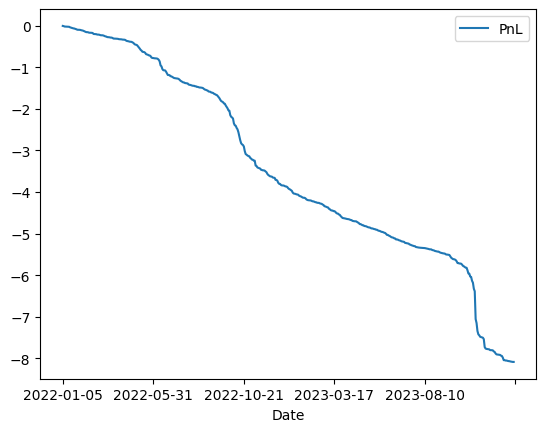

In [35]:
combi,pnl = calculate_alpha_performance_test(test_array,'((Low) - ((Open))) + Close - Low + ((High / Volume))',0.01)

In [36]:
float(pnl.iloc[-1,1])

-8.085716121620754

In [37]:
combi

,Date,Ticker,Dod Return,2nd Dod Return,Alpha Value,Rank,Alpha Rank,Centered 0,Abs Centered 0,Sum Rank,Normalized,Allocated,PnL
0,2022-01-05,SPG Dod Return,-0.053718,-0.046003,5.316545,6,1.0,0.5,0.5,1.8,0.277778,5.555556,-0.255571
1,2022-01-05,PSA Dod Return,-0.053718,-0.046003,5.316545,4,0.6,0.1,0.1,1.8,0.055556,1.111111,-0.051114
2,2022-01-05,PLD Dod Return,-0.053718,-0.046003,5.316545,1,0.0,-0.5,0.5,1.8,-0.277778,-5.555556,0.255571
3,2022-01-05,DLR Dod Return,-0.053718,-0.046003,5.316545,2,0.2,-0.3,0.3,1.8,-0.166667,-3.333333,0.153343
4,2022-01-05,AMT Dod Return,-0.053718,-0.046003,5.316545,3,0.4,-0.1,0.1,1.8,-0.055556,-1.111111,0.051114
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2989,2023-12-29,SPG Dod Return,-0.019041,NaN,4.668895,2,0.2,-0.3,0.3,1.8,-0.166667,-3.333333,NaN
2990,2023-12-29,AMT Dod Return,-0.019041,NaN,4.668895,3,0.4,-0.1,0.1,1.8,-0.055556,-1.111111,NaN
2991,2023-12-29,PLD Dod Return,-0.019041,NaN,4.668895,4,0.6,0.1,0.1,1.8,0.055556,1.111111,NaN
2992,2023-12-29,DLR Dod Return,-0.019041,NaN,4.668895,6,1.0,0.5,0.5,1.8,0.277778,5.555556,NaN


In [28]:
pnl.iloc[-1,0]

'2023-12-29'

In [29]:
total_trade_amount = 20
portfolio_value = total_trade_amount+float(pnl.iloc[-1,1])
expected_return_total = (portfolio_value-total_trade_amount)/total_trade_amount+1
print('expected return: ',expected_return_total)

#annualise rate of return
delta = pnl.iloc[-1,0] - pnl.iloc[0,0]
years_delta = delta.days/365
print('number of years:',years_delta)

annualised_return = pow(expected_return_total,1/years_delta) - 1
print('annualised return: ',annualised_return)

expected return:  0.5957141939189623


TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [30]:
import numpy as np

In [31]:
stddev = np.std(combi['PnL'].dropna().to_list())
print('standard dev: ',stddev)

standard dev:  0.7593604366548427


In [61]:
# US 10 Year Treasury Yield: risk free rate:
risk_free_rate_2019_to_2024 = [0.02,0.01,0.015,0.03,0.035,0.04]
average_rfr = sum(risk_free_rate_2019_to_2024)/len(risk_free_rate_2019_to_2024)
print('average risk free rate: ',average_rfr)

average risk free rate:  0.024999999999999998


In [62]:
sharpe_ratio = (annualised_return-average_rfr)/stddev
print('Sharpe ratio: ',sharpe_ratio)

Sharpe ratio:  13.27005356965302


In [92]:
generateAlphas(10)

['((Low / ((Volume)) * Volume)) / (((Low)) / Low / (Open))',
 '(Open / Volume * Volume)',
 'Volume + High + Low - ((Volume))',
 'High * ((Open))',
 'Volume - Low',
 '((Volume))',
 '(Open + (Open))',
 '(Close) * Close + Low * Low - Volume * Close',
 '(Low)',
 '(Open + (High) / Low)']

In [22]:
class Node:
    def __init__(self, value):
        self.value = value
        self.children = []

def parse_expression(tokens):
    node = parse_term(tokens)

    while tokens and tokens[0] in ['+', '-']:
        operator = tokens.pop(0)
        right = parse_term(tokens)
        new_node = Node(operator)
        new_node.children.extend([node, right])
        node = new_node

    return node

def parse_term(tokens):
    node = parse_factor(tokens)

    while tokens and tokens[0] in ['*', '/']:
        operator = tokens.pop(0)
        right = parse_factor(tokens)
        new_node = Node(operator)
        new_node.children.extend([node, right])
        node = new_node

    return node

def parse_factor(tokens):
    if not tokens:
        raise ValueError("Unexpected end of expression")

    token = tokens.pop(0)

    if token.isalnum():  # Changed from isdigit() to isalnum() to handle alphabetic tokens
        return Node(token)
    elif token == '(':
        node = parse_expression(tokens)
        if tokens[0] != ')':
            raise ValueError("Expected ')'")
        tokens.pop(0)  # Consume ')'
        return node
    else:
        raise ValueError(f"Unexpected token: {token}")

def parse_math_expression(expression):
    tokens = expression.replace('(', ' ( ').replace(')', ' ) ').split()
    return parse_expression(tokens)

# Example usage
math_expression = "((Open / Volume) + Open - Open * (Volume) / Volume * ((Close - Open)))"
parse_tree_root = parse_math_expression(math_expression)

math_expression = "((Open / Volume) + Open - Open * (Volume) / Volume * ((Close - Open)))"
p1 = parse_math_expression(math_expression)

math_expression = "(Open - Open * (Volume) / Volume * ((Close - Open)))"
p2 = parse_math_expression(math_expression)

# Helper function to visualize the tree
def print_tree(node, depth=0, prefix=""):
    # Handle the root node
    if depth == 0:
        print(node.value)
    else:
        print(prefix + "└── " + node.value)

    if node.children:
        new_prefix = prefix + ("    " if depth == 0 else "│   ")
        for i, child in enumerate(node.children):
            # Update the prefix for the last child
            if i == len(node.children) - 1:
                new_prefix = prefix + "    "
            print_tree(child, depth + 1, new_prefix)

print_tree(parse_tree_root)

-
    └── +
    │   └── /
    │   │   └── Open
    │       └── Volume
        └── Open
    └── *
    │   └── /
    │   │   └── *
    │   │   │   └── Open
    │   │       └── Volume
    │       └── Volume
        └── -
        │   └── Close
            └── Open


In [23]:
def tree_to_expression(node):
    # If the node is a leaf (has no children), return its value
    if not node.children:
        return node.value

    # If the node is not a leaf, it should be an operator
    # We then recursively get the expressions of its children
    left_expr = tree_to_expression(node.children[0])
    right_expr = tree_to_expression(node.children[1])

    # Construct and return the expression string
    return f"({left_expr} {node.value} {right_expr})"

# Example usage
# Assuming root is the root of your expression tree
expression = tree_to_expression(p1)
print(expression)

(((Open / Volume) + Open) - (((Open * Volume) / Volume) * (Close - Open)))


In [50]:
objective(files_array,'((Low)) + Open / (Open) - Open')

Calculating performance for alpha: ((Low)) + Open / (Open) - Open
AVERAGE RETURN:  8.880583934374993


8.880583934374993

In [97]:
print(crossover(p1,p2,r_cross))

fixed left p1:  (Open + Volume)  fixed right p1:  ((Close) - Low / ((Low + Close)))
fixed left p2:  Close - (High * High - Low + Open)  fixed right p2:  (High)
['(Open + Volume) + (High)', 'Close - (High * High - Low + Open) + ((Close) - Low / ((Low + Close)))']


In [41]:
crossover(p1,p2,r_cross)

fixed left p1:  (Open + Volume + (Close) - Low / ((Low)))  fixed right p1:  (((Close)))
fixed left p2:  Close - (High * High - Low)  fixed right p2:  (Open * High)


In [37]:
find_missing_bracket('(Open + Volume + (Close)')

')'